1


/var/folders/yr/y611d4w96l70gtdz93wrslyr0000gn/T/ipykernel_94127/3513304942.py:63: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig('MeltDayAnomaly.png')
/var/folders/yr/y611d4w96l70gtdz93wrslyr0000gn/T/ipykernel_94127/3513304942.py:64: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig('MeltDayAnomaly.svg')


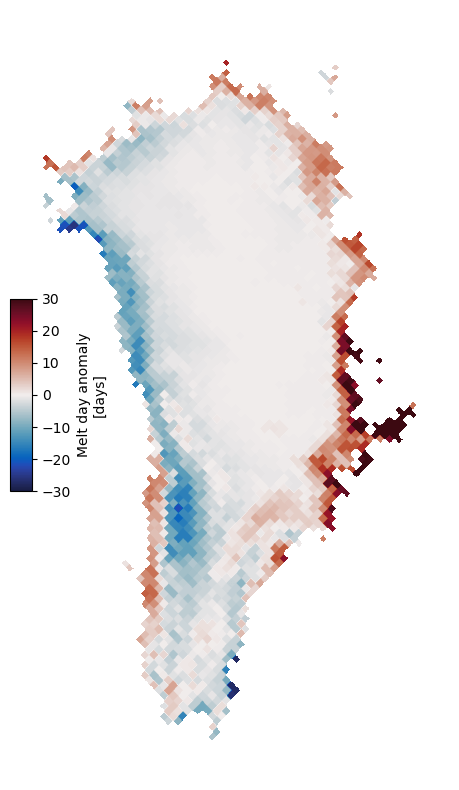

In [11]:
# Melt day anomaly plot
import matplotlib
import matplotlib.pyplot as plt
import datetime
import numpy as np
import pandas as pd
import geopandas as gp
import rasterio as rio
import rasterio.mask
from rasterio.plot import plotting_extent
import shapefile as shp
import cmocean
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.colors as mcolors
from matplotlib import rc

C_land = "#EAEAEA"
C_ocean = "#D0CFD4"

fig = plt.figure(1, figsize=(8,8)) # w,h
fig.clf()
fig.set_tight_layout(True)
import matplotlib.gridspec as gridspec

gs = gridspec.GridSpec(2,2, width_ratios=[1,1], height_ratios=[5,1]) #w,h

# Basemap Greenland land area
baseland = shp.Reader('greenland-coasts/GRL_adm0_3413.shp')
print(len(baseland.shapes()))
baseshape = baseland.shape(0)
xshp = np.zeros((len(baseshape.points),1))
yshp = np.zeros((len(baseshape.points),1))
for i in range(len(baseshape.points)):
    xshp[i] = baseshape.points[i][0]
    yshp[i] = baseshape.points[i][1]
# plt.fill_between(xshp,yshp,'black')

melt_day_anomaly = rio.open('greenland_melt_anomaly_colorless_20240401-20240831.tif')
melt_day_anomaly_extent = plotting_extent(melt_day_anomaly)
melt_day_anomaly = melt_day_anomaly.read(1)
melt_day_anomaly[melt_day_anomaly== -999] = np.nan

# Color map and color limits
vmin=-30
vmax=30
cmap = matplotlib.colormaps.get_cmap(cmocean.cm.balance)
im_melt = plt.imshow(melt_day_anomaly, extent=melt_day_anomaly_extent, cmap=cmap, vmin=vmin, vmax=vmax)
plt.axis('off')

ax_cb = inset_axes(plt.gca(),
                          width="5%",  # width = 5% of parent_bbox width
                          height="25%",  # height : 50%
                          loc='center left',
                          bbox_to_anchor=(0, 0, 1, 1),
                          bbox_transform=plt.gca().transAxes,
                          borderpad=0)

cbar = matplotlib.colorbar.ColorbarBase(ax_cb, cmap=cmap, norm=matplotlib.colors.Normalize(vmin=vmin, vmax=vmax))
cbar.set_label('Melt day anomaly\n[days]')



plt.savefig('MeltDayAnomaly.png')
plt.savefig('MeltDayAnomaly.svg')
plt.show()

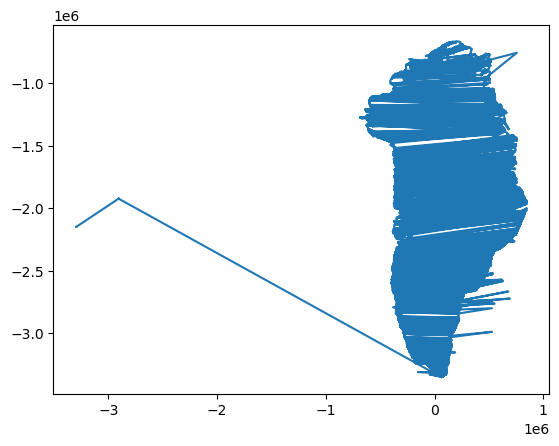

In [6]:
plt.figure()
plt.plot(xshp,yshp)